In [3]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:,2:41]
y = data[:,41]

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit_transform(self, X):
        # Subtract the mean from each feature
        X = X - np.mean(X, axis=0)
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(X.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:,sorted_idx]
        
        # Select the top n eigenvectors as the principal components
        principal_components = eigenvectors[:,:self.n_components]
        
        # Project the data onto the principal components
        transformed_data = np.dot(X, principal_components)
        
        return transformed_data
# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier and an MLP classifier
svc = SVC(kernel='linear', C=1, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
0
# Define the stacking classifier
estimators = [('svc', svc), ('nn', nn)]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(), cv=5)

# Fit the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(accuracy)
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print(y_pred)
print(classification_report(y_test,y_pred))


0.8707782672540382
Accuracy: 0.8707782672540382
Confusion matrix: [[1042   50]
 [ 126  144]]
[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1092
         1.0       0.74      0.53      0.62       270

    accuracy                           0.87      1362
   macro avg       0.82      0.74      0.77      1362
weighted avg       0.86      0.87      0.86      1362



In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:, 2:41]
y = data[:, 41]

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier and an ANN classifier
svc = SVC(kernel='linear', C=1, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Define the stacking classifier
estimators = [('svc', svc), ('nn', nn)]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(), cv=5)

# Fit the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

y_pred = clf.predict(X_test)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print("Classification report:", classification_report(y_test, y_pred))


Accuracy: 0.869309838472834
Confusion matrix: [[1028   64]
 [ 114  156]]
Classification report:               precision    recall  f1-score   support

         0.0       0.90      0.94      0.92      1092
         1.0       0.71      0.58      0.64       270

    accuracy                           0.87      1362
   macro avg       0.80      0.76      0.78      1362
weighted avg       0.86      0.87      0.86      1362



In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:,2:41]
y = data[:,41]

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a RandomForest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rfc.fit(X_train, y_train)

# Evaluate the model
accuracy = rfc.score(X_test, y_test)
print("Accuracy:", accuracy)
y_pred = rfc.predict(X_test)
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))


Accuracy: 0.8986784140969163
Confusion matrix: [[1064   28]
 [ 110  160]]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1092
         1.0       0.85      0.59      0.70       270

    accuracy                           0.90      1362
   macro avg       0.88      0.78      0.82      1362
weighted avg       0.90      0.90      0.89      1362



0.8707782672540382
Accuracy: 0.8707782672540382
Confusion matrix: [[1042   50]
 [ 126  144]]
[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1092
         1.0       0.74      0.53      0.62       270

    accuracy                           0.87      1362
   macro avg       0.82      0.74      0.77      1362
weighted avg       0.86      0.87      0.86      1362

Area under the curve: 0.8730870980870981


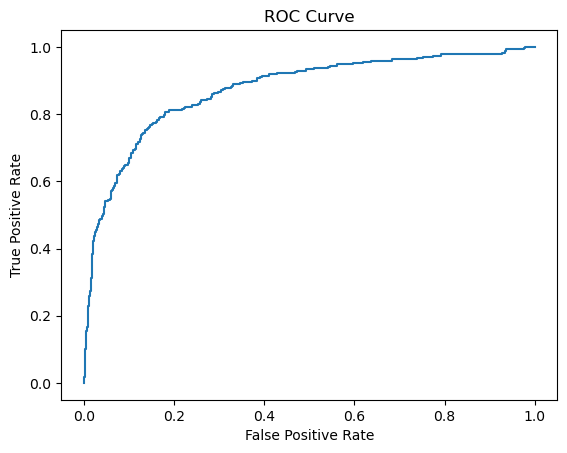

In [7]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:,2:41]
y = data[:,41]

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit_transform(self, X):
        # Subtract the mean from each feature
        X = X - np.mean(X, axis=0)
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(X.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:,sorted_idx]
        
        # Select the top n eigenvectors as the principal components
        principal_components = eigenvectors[:,:self.n_components]
        
        # Project the data onto the principal components
        transformed_data = np.dot(X, principal_components)
        
        return transformed_data
# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier and an MLP classifier
svc = SVC(kernel='linear', C=1, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Define the stacking classifier
estimators = [('svc', svc), ('nn', nn)]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(), cv=5)

# Fit the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(accuracy)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))
print(y_pred)
print(classification_report(y_test,y_pred))
auc = roc_auc_score(y_test, y_prob)

print("Area under the curve:", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Accuracy: 0.8707782672540382
Accuracy: 0.8707782672540382
Confusion matrix:
[[1040   52]
 [ 124  146]]


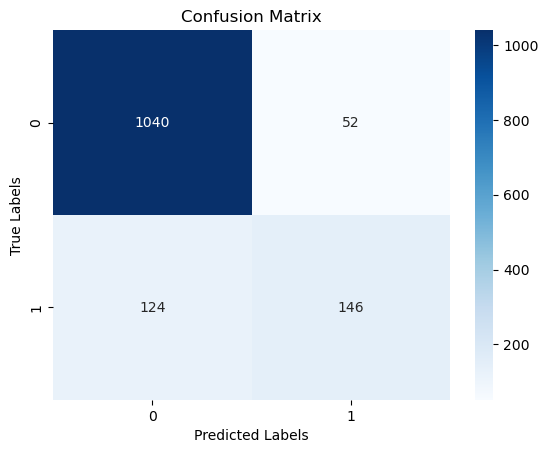

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92      1092
         1.0       0.74      0.54      0.62       270

    accuracy                           0.87      1362
   macro avg       0.82      0.75      0.77      1362
weighted avg       0.86      0.87      0.86      1362



In [11]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:,2:41]
y = data[:,41]

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit_transform(self, X):
        # Subtract the mean from each feature
        X = X - np.mean(X, axis=0)
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(X.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:,sorted_idx]
        
        # Select the top n eigenvectors as the principal components
        principal_components = eigenvectors[:,:self.n_components]
        
        # Project the data onto the principal components
        transformed_data = np.dot(X, principal_components)
        
        return transformed_data

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier and an MLP classifier
svc = SVC(kernel='linear', C=1, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Define the stacking classifier
estimators = [('svc', svc), ('nn', nn)]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(), cv=5)

# Fit the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict the target variable
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Convert confusion matrix to pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:,2:41]
y = data[:,41]

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        
    def fit_transform(self, X):
        # Subtract the mean from each feature
        X = X - np.mean(X, axis=0)
        
        # Calculate the covariance matrix
        cov_matrix = np.cov(X.T)
        
        # Calculate the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        
        # Sort the eigenvalues and eigenvectors in descending order of eigenvalues
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_idx]
        eigenvectors = eigenvectors[:,sorted_idx]
        
        # Select the top n eigenvectors as the principal components
        principal_components = eigenvectors[:,:self.n_components]
        
        # Project the data onto the principal components
        transformed_data = np.dot(X, principal_components)
        
        return transformed_data

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier and an MLP classifier
svc = SVC(kernel='linear', C=1, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Define the stacking classifier
estimators = [('svc', svc), ('nn', nn)]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(), cv=5)

# Fit the model
clf.fit(X_train, y_train)

# Take input from the user
input_data = np.array([[YOUR_INPUT_DATA]])  # Replace YOUR_INPUT_DATA with the actual input data

# Apply PCA transformation and scale the input data
input_data = pca.transform(input_data)
input_data = scaler.transform(input_data)

# Predict the class label
predicted_label = clf.predict(input_data)

# Print the prediction
if predicted_label == 1:
    print("Sepsis")
else:
    print("No Sepsis")


0.8722466960352423
Accuracy: 0.8722466960352423
[[1032   60]
 [ 114  156]]


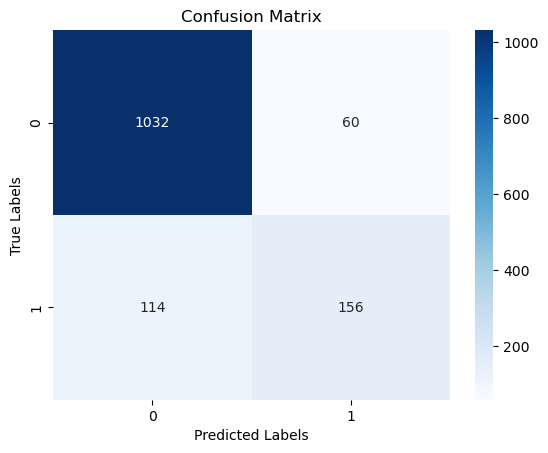

[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92      1092
         1.0       0.72      0.58      0.64       270

    accuracy                           0.87      1362
   macro avg       0.81      0.76      0.78      1362
weighted avg       0.87      0.87      0.87      1362

Area under the curve: 0.8718796635463302


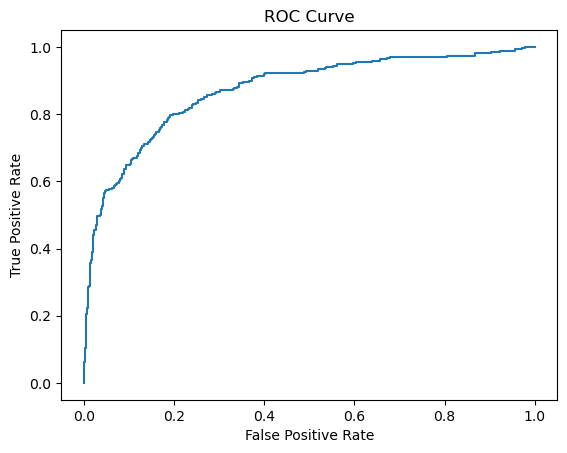

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:, 2:41]
y = data[:, 41]

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier and an ANN classifier
svc = SVC(kernel='linear', C=1, random_state=42)
nn = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Define the stacking classifier
estimators = [('svc', svc), ('nn', nn)]
clf = StackingClassifier(estimators=estimators, final_estimator=MLPClassifier(), cv=5)

# Fit the model
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(accuracy)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Convert confusion matrix to pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print(y_pred)
print(classification_report(y_test,y_pred))
auc = roc_auc_score(y_test, y_prob)

print("Area under the curve:", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

0.8986784140969163
Accuracy: 0.8986784140969163
[[1064   28]
 [ 110  160]]


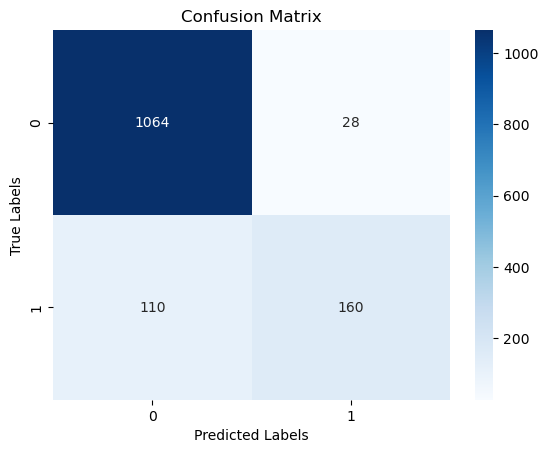

[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1092
         1.0       0.85      0.59      0.70       270

    accuracy                           0.90      1362
   macro avg       0.88      0.78      0.82      1362
weighted avg       0.90      0.90      0.89      1362

Area under the curve: 0.9244301994301994


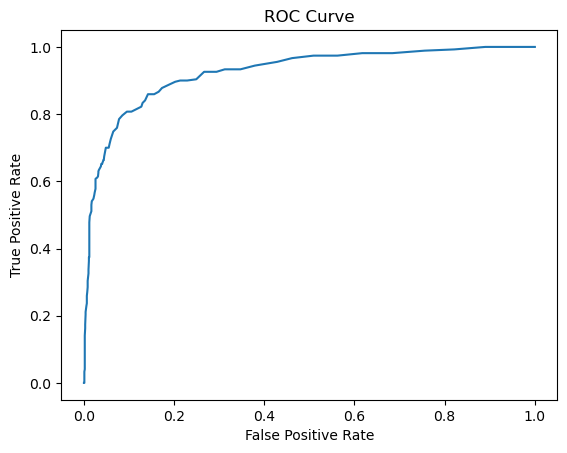

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:,2:41]
y = data[:,41]

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a RandomForest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rfc.fit(X_train, y_train)

# Evaluate the model
accuracy = rfc.score(X_test, y_test)
print(accuracy)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Convert confusion matrix to pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print(y_pred)
print(classification_report(y_test,y_pred))
auc = roc_auc_score(y_test, y_prob)

print("Area under the curve:", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Epoch 1/30
171/171 [==============================] - 1s 2ms/step - loss: 0.5051 - accuracy: 0.7987
Epoch 2/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8406
Epoch 3/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8531
Epoch 4/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8630
Epoch 5/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8713
Epoch 6/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8742
Epoch 7/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3102 - accuracy: 0.8845
Epoch 8/30
171/171 [==============================] - 0s 3ms/step - loss: 0.2971 - accuracy: 0.8893
Epoch 9/30
171/171 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8929
Epoch 10/30
171/171 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8964

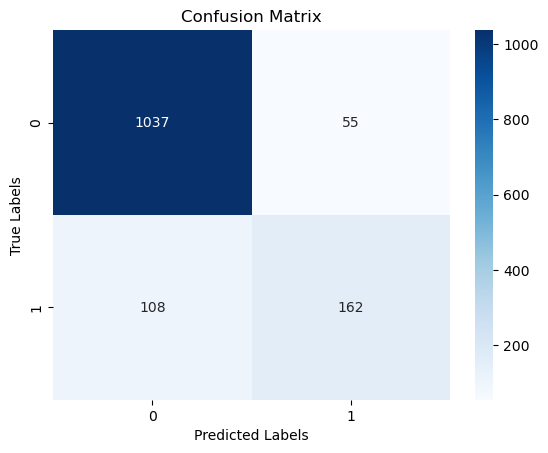

Area under the curve: 0.8677757427757429


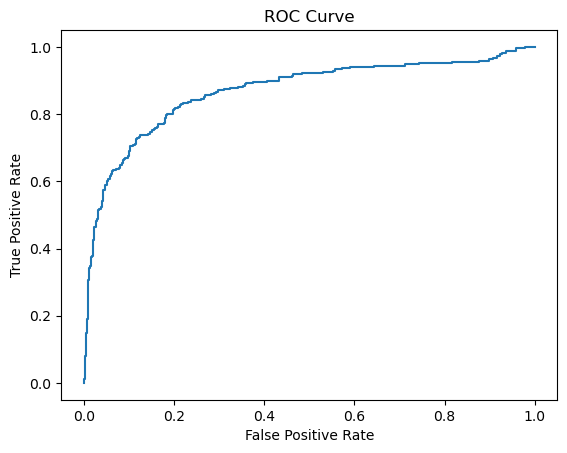

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:, 2:41]
y = data[:, 41]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Predict probabilities for the test set
y_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.round(y_prob).flatten()

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Convert confusion matrix to pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC-AUC
auc = roc_auc_score(y_test, y_prob)
print("Area under the curve:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


0.8509544787077826
Accuracy: 0.8509544787077826
[[1052   40]
 [ 163  107]]


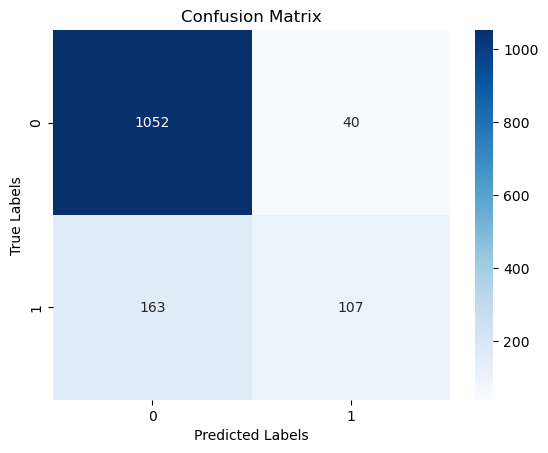

[0. 0. 0. ... 0. 0. 0.]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1092
         1.0       0.73      0.40      0.51       270

    accuracy                           0.85      1362
   macro avg       0.80      0.68      0.71      1362
weighted avg       0.84      0.85      0.83      1362

Area under the curve: 0.8366334283000948


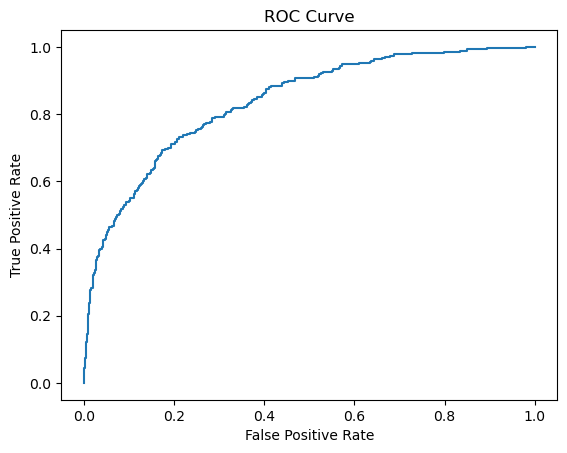

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the dataset
data = pd.read_csv("sepsis-6800.csv")
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data = imputer.fit_transform(data)

# Split the dataset into features and target
X = data[:,2:41]
y = data[:,41]

# Apply PCA to reduce the number of features
pca = PCA(n_components=10)
X = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a RandomForest classifier
rfc = AdaBoostClassifier(n_estimators=500, random_state=42)

# Fit the model
rfc.fit(X_train, y_train)

# Evaluate the model
accuracy = rfc.score(X_test, y_test)
print(accuracy)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Convert confusion matrix to pictorial representation (heatmap)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print(y_pred)
print(classification_report(y_test,y_pred))
auc = roc_auc_score(y_test, y_prob)

print("Area under the curve:", auc)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Epoch 1/30
171/171 [==============================] - 1s 2ms/step - loss: 0.4850 - accuracy: 0.8096
Epoch 2/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8264
Epoch 3/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8298
Epoch 4/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8338
Epoch 5/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8358
Epoch 6/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8378
Epoch 7/30
171/171 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8397
Epoch 8/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8413
Epoch 9/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8435
Epoch 10/30
171/171 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8459

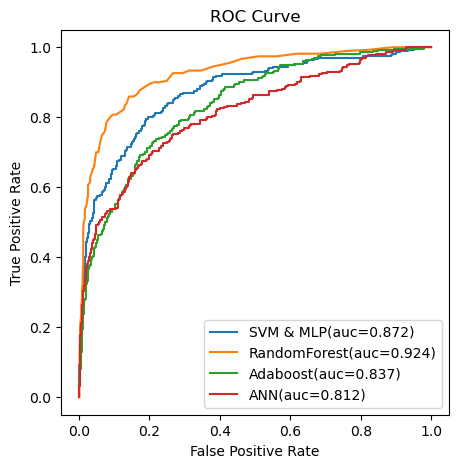